# PJI Mesure de la consommation énergétique de Flower

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
locale.setlocale(locale.LC_NUMERIC, 'fr_FR.UTF-8')

'fr_FR.UTF-8'

In [63]:
def graphes(client, serveur):
    df_client = pd.DataFrame(client)
    df_serveur = pd.DataFrame(serveur)

    tours = list(range(0,len(df_client)//2))

    # CLients
    y_client1 = list(df_client['uncore_0'][::2])
    y_client2 = list(df_client['uncore_0'][1::2])

    fit_client1_params = np.polyfit(tours, y_client1, 4)
    fit_client1 = np.poly1d(fit_client1_params)
    mean_client1 = np.mean(y_client1)

    fit_client2_params = np.polyfit(tours, y_client2, 4)
    fit_client2 = np.poly1d(fit_client1_params)
    mean_client2 = np.mean(y_client2)


    # Serveur    

    y_serveur = list(df_serveur['uncore_0'])[:len(df_serveur)]


    fit_serveur_params = np.polyfit(tours, y_serveur, 4)
    fit_serveur = np.poly1d(fit_serveur_params)

    mean_serveur = np.mean(y_serveur)


    print("La Moyenne d'énergie dépensée par le client 1 est de : ", "{:,}".format(round(mean_client1,2)), "Joules")
    print("La Moyenne d'énergie dépensée par le client 2 est de : ", "{:,}".format(round(mean_client2,2)), "Joules")
    print("La Moyenne d'énergie dépensée par le serveur est de : ", "{:,}".format(round(mean_serveur,2)), "Joules")

    plt.title("Energie dépensée")
    plt.xlabel("Tours")
    plt.ylabel("Energie (J)")

    # Show the plot
    plt.plot(tours,y_client1, "g", label="client 1")
    plt.plot(tours,y_client2, "b", label="client 2")
    plt.plot(tours,y_serveur, "r", label="serveur")

    plt.title("Energie dépensée")
    plt.xlabel("Tours")
    plt.ylabel("Energie (J)")

    plt.legend()
    plt.show()


    plt.title("Energie dépensée")
    plt.xlabel("Tours")
    plt.ylabel("Energie (J)")

    plt.plot(tours,y_client1, "g", alpha=0.5)
    plt.plot(tours,y_client2, "b", alpha=0.5)
    plt.plot(tours,y_serveur, "r", alpha=0.5)

    plt.plot(tours,fit_client1(tours), "g", linewidth=4,  label="Fit client 1")
    plt.plot(tours,fit_client2(tours), "b", linewidth=4,  label="Fit client 2")
    plt.plot(tours,fit_serveur(tours), "r", linewidth=4,  label="Fit serveur")

    plt.legend()
    plt.show()

La fonction **graphes(client, serveur)** permet de récupérer les informations des fichiers csv sur la consommation énergétique côté client et serveur.

Les fichiers csv sont rangés dans des dossiers ayant pour nom l'outil d'apprentissage et le dataset utilisé.  
A l'intérieur de ces dossiers, il peut y avoir plusieurs fichiers csv, ils sont rangés en fonction de la modification des paramètres.

### Tensorflow + Cifar10

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  9,178,604.5 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  9,179,156.65 Joules
La Moyenne d'énergie dépensée par le serveur est de :  10,202,084.67 Joules


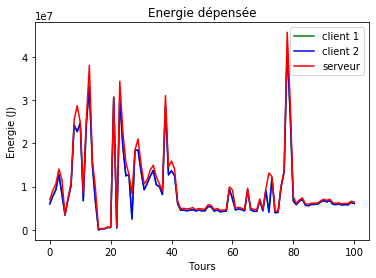

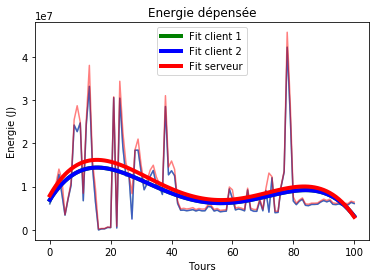

In [64]:
client = pd.read_csv("tensorflow_cifar10/result_client.csv",sep=';', usecols=['duration','package_0','core_0','uncore_0'])
serveur = pd.read_csv("tensorflow_cifar10/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[:len(client)//2]

graphes(client, serveur)

Ci-dessus c'est l'outil **Tensorflow** qui est utilisé avec le dataset **Cifar10**.

On peut voir que la moyenne de consommation pour les clients est d'environ 9 MJ, et pour le serveur de 10 MJ.
Les courbes de suivi de tendance (Fit) côté client sont superposées, et suivent le même tracé que celle côté serveur en restant inférieures.

Nous allons ensuite changer quelques paramètres côté client pour observer ceux qui influent directement sur la consommation énergétique.

Ci-dessous nous allons passer le nombre de **classes** de 10 à 100.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  4,273,741.15 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  4,275,103.97 Joules
La Moyenne d'énergie dépensée par le serveur est de :  4,593,659.91 Joules


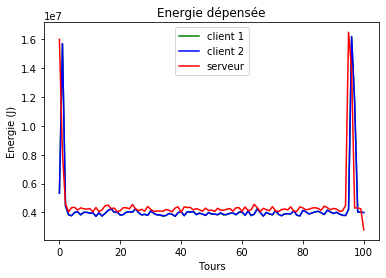

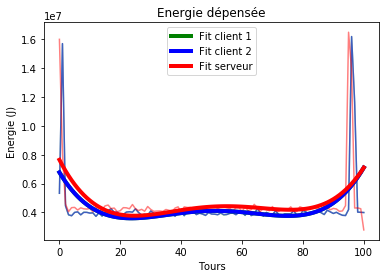

In [65]:
client = pd.read_csv("tensorflow_cifar10/result_client_classes_100.csv",';', usecols=['duration','package_0','core_0','uncore_0'])
serveur = pd.read_csv("tensorflow_cifar10/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[102:102+len(client)//2]

graphes(client,serveur)

On peut observer que la consommation a largement réduit. La moyenne est passée de 9 MJ à 4,27 MJ côté client, et 10 MJ à 4,59 MJ côté serveur.

Le nombre de classes influe donc sur la consommation énergétique.

On passe ensuite le ***batch_size*** de 32 à 64. Et on garde le nombre de classes à 10 pour toujours comparer à la consommation initiale.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  1,750,852.17 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  1,754,853.9 Joules
La Moyenne d'énergie dépensée par le serveur est de :  2,071,664.03 Joules


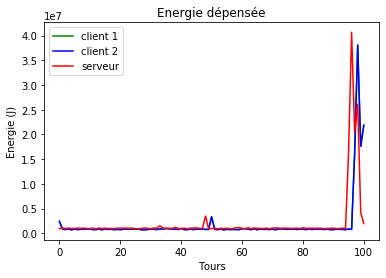

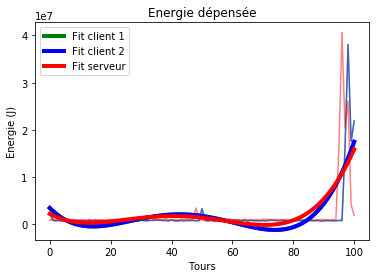

In [66]:
client = pd.read_csv("tensorflow_cifar10/result_client_batch_size_64.csv",';', usecols=['duration','package_0','core_0','uncore_0'])
serveur = pd.read_csv("tensorflow_cifar10/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[102*2:102*2+len(client)//2]

graphes(client,serveur)

On voit ici aussi que la consommation à nettement baissée, la moyenne passe de 9 MJ à 1,75 MJ côté client et 10 MJ à 2 MJ côté serveur.

Le dernier test avec cette configuration (**Tensorflow + Cifar10**) est fait en modifiant le paramètre ***epochs***, en le passant de 1 à 5.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  1,604,047.33 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  1,605,386.65 Joules
La Moyenne d'énergie dépensée par le serveur est de :  1,933,608.05 Joules


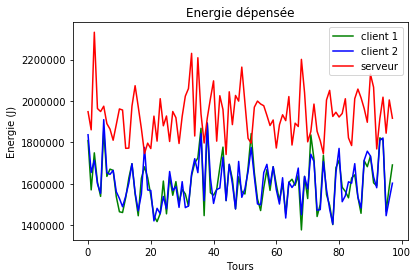

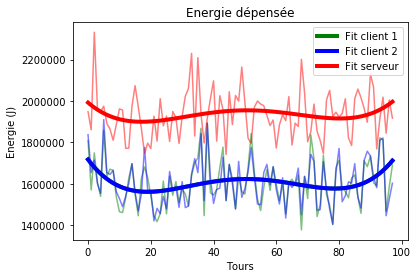

In [67]:
client = pd.read_csv("tensorflow_cifar10/result_client_epochs_5.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[:-6]
serveur = pd.read_csv("tensorflow_cifar10/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[102*3:]

graphes(client,serveur)

Pour ce dernier test, on constate que la consommation fluctue énormément des deux côtés. Les deux courbes se suivent mais la consommation du serveur reste toujours plus élevée. La moyenne diminue quand même et passe de 9 MJ à 1,6 MJ pour les clients, et de 10 MJ à 1,9 MJ pour le serveur.

### Pytorch + Cifar10

On passe maintenant à l'outil Pytorch, en gardant le dataset Cifar10.  
On utilise les paramètres donnés initialement.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  28,852,192.15 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  28,774,760.89 Joules
La Moyenne d'énergie dépensée par le serveur est de :  29,255,704.75 Joules


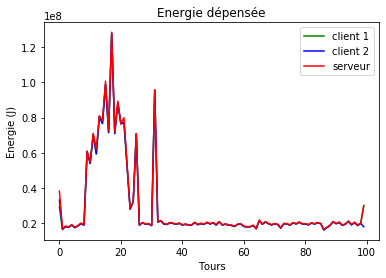

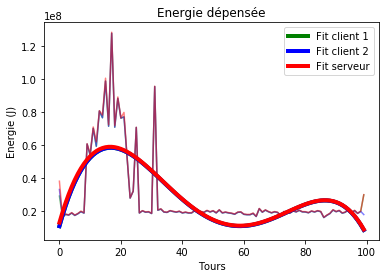

In [68]:
client = pd.read_csv("pytorch_cifar10/result_client.csv",';', usecols=['duration','package_0','core_0','uncore_0'])
serveur = pd.read_csv("pytorch_cifar10/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[:len(client)//2]

graphes(client,serveur)

On note ici que la consommation est beaucoup plus élevée que pour Tensorflow, la moyenne du client est de 28,85 MJ, et celle du serveur est de 29,25 MJ. Les courbes sont presque identiques.

Le premier paramètre que l'on modifie est l'***epochs***, on le passe de 1 à 5.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  49,278,128.72 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  48,861,239.77 Joules
La Moyenne d'énergie dépensée par le serveur est de :  49,791,327.67 Joules


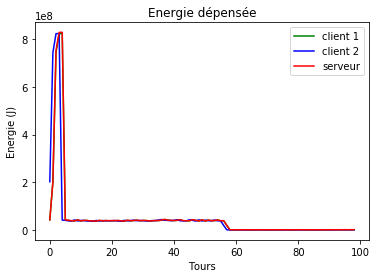

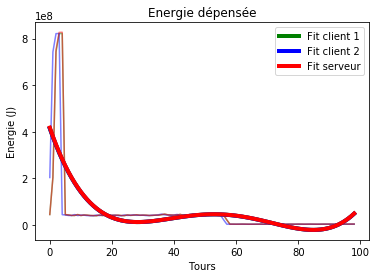

In [69]:
client = pd.read_csv("pytorch_cifar10/result_client_epochs_5.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[:-1]
serveur = pd.read_csv("pytorch_cifar10/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[100:100+len(client)//2]

graphes(client,serveur)

On constate ici aussi que la consommation est beaucoup plus élevée, la moyenne passe à 49 MJ pour les clients et le serveur.

Les paramètres sont réinitialisés avant de modifier le ***batch_size*** de 32 à 64.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  18,236,460.57 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  18,143,500.96 Joules
La Moyenne d'énergie dépensée par le serveur est de :  18,695,297.11 Joules


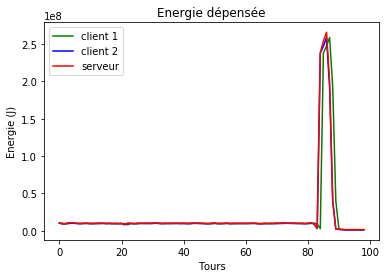

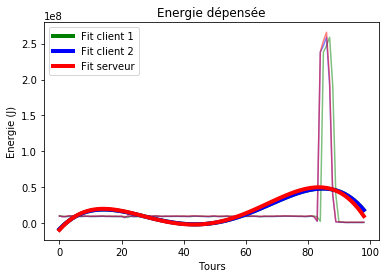

In [70]:
client = pd.read_csv("pytorch_cifar10/result_client_batch_size_64.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[:-1]
serveur = pd.read_csv("pytorch_cifar10/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[201:]

graphes(client,serveur)

Ici la consommation énergétique diminue très fortement par rapport aux essais précédents. La moyenne est maintenant d'environ 18 MJ.

Avec ces différents essais, on peut conclure que l'outil Tensorflow est largement moins énergivore que Pytorch, peu importe les paramètres.  
On peut ajouter que le paramètre qui fait économiser le plus d'énergie est le ***batch_size***, on l'a fait passer de 32 à 64 avec les différents outils, et il permet de moins consommer d'énergie.

### Tensorflow + Mnist

On réessaye maintenant avec l'outil **Tensorflow**, mais avec le dataset **mnist**.

In [71]:
def graphes2(client1, client2, serveur):
    df_client1 = pd.DataFrame(client1)
    df_client2 = pd.DataFrame(client2)
    df_serveur = pd.DataFrame(serveur)

    tours = list(range(0,len(df_client1)))

    # CLients
    y_client1 = list(df_client1['uncore_0'])
    y_client2 = list(df_client2['uncore_0'])
    
    print(len(y_client1),len(y_client2),len(tours))
    
    fit_client1_params = np.polyfit(tours, y_client1, 4)
    fit_client1 = np.poly1d(fit_client1_params)
    mean_client1 = np.mean(y_client1)

    fit_client2_params = np.polyfit(tours, y_client2, 4)
    fit_client2 = np.poly1d(fit_client1_params)
    mean_client2 = np.mean(y_client2)


    # Serveur    

    y_serveur = list(df_serveur['uncore_0'])[:len(df_serveur)]


    fit_serveur_params = np.polyfit(tours, y_serveur, 4)
    fit_serveur = np.poly1d(fit_serveur_params)

    mean_serveur = np.mean(y_serveur)


    print("La Moyenne d'énergie dépensée par le client 1 est de : ", "{:,}".format(round(mean_client1,2)), "Joules")
    print("La Moyenne d'énergie dépensée par le client 2 est de : ", "{:,}".format(round(mean_client2,2)), "Joules")
    print("La Moyenne d'énergie dépensée par le serveur est de : ", "{:,}".format(round(mean_serveur,2)), "Joules")

    plt.title("Energie dépensée")
    plt.xlabel("Tours")
    plt.ylabel("Energie (J)")

    # Show the plot
    plt.plot(tours,y_client1, "g", label="client 1")
    plt.plot(tours,y_client2, "b", label="client 2")
    plt.plot(tours,y_serveur, "r", label="serveur")

    plt.title("Energie dépensée")
    plt.xlabel("Tours")
    plt.ylabel("Energie (J)")

    plt.legend()
    plt.show()


    plt.title("Energie dépensée")
    plt.xlabel("Tours")
    plt.ylabel("Energie (J)")

    plt.plot(tours,y_client1, "g", alpha=0.5)
    plt.plot(tours,y_client2, "b", alpha=0.5)
    plt.plot(tours,y_serveur, "r", alpha=0.5)

    plt.plot(tours,fit_client1(tours), "g", linewidth=4,  label="Fit client 1")
    plt.plot(tours,fit_client2(tours), "b", linewidth=4,  label="Fit client 2")
    plt.plot(tours,fit_serveur(tours), "r", linewidth=4,  label="Fit serveur")

    plt.legend()
    plt.show()
    


/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


310 310 310
La Moyenne d'énergie dépensée par le client 1 est de :  625,809.29 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  627,023.04 Joules
La Moyenne d'énergie dépensée par le serveur est de :  1,543,416.89 Joules


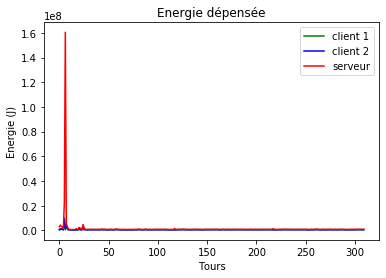

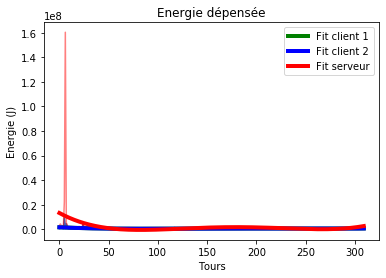

In [72]:
client1 = pd.read_csv("tensorflow_mnist/result_client1.csv",';', usecols=['duration','package_0','core_0','uncore_0'])
client2 = pd.read_csv("tensorflow_mnist/result_client2.csv",';', usecols=['duration','package_0','core_0','uncore_0'])

serveur = pd.read_csv("tensorflow_mnist/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[:len(client1)]

graphes2(client1, client2, serveur)

La consommation est ici largement inférieure aux précédentes,la moyenne des clients est de 626 kJ, et celle du serveur est de 1.5 MJ. La consommation du serveur est deux fois plus élevée que celle des clients, mais reste convenable par rapport aux précédents tests.

Toujours avec le dataset **mnist** et Tensorflow, on modifie l'***epochs*** de 1 à 5.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


300 300 300
La Moyenne d'énergie dépensée par le client 1 est de :  856,421.1 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  854,122.58 Joules
La Moyenne d'énergie dépensée par le serveur est de :  1,343,491.68 Joules


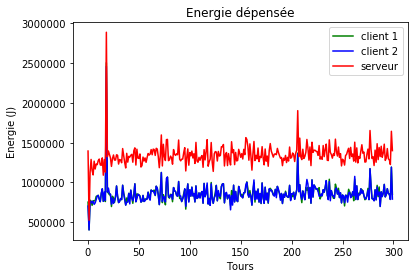

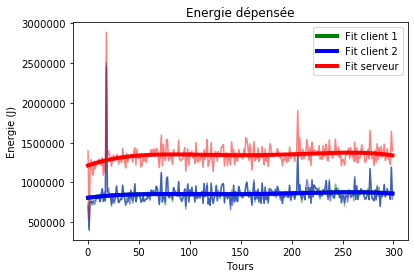

In [73]:
client1 = pd.read_csv("tensorflow_mnist/result_client1_epochs_5.csv",';', usecols=['duration','package_0','core_0','uncore_0'])
client2 = pd.read_csv("tensorflow_mnist/result_client2_epochs_5.csv",';', usecols=['duration','package_0','core_0','uncore_0'])

serveur = pd.read_csv("tensorflow_mnist/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])[310:]

graphes2(client1, client2, serveur)

On constate ici aussi que la consommation fluctue beaucoup, mais reste dans le même ordre de grandeur. La moyenne des clients est de 855 kJ, et 1.34 MJ pour le serveur.  
Cest résultats sont très corrects grâce au dataset **mnist**, on peut noter une faible consommation énergétique en comparaison avec le dataset **cifar10**.

### Mxnet + Gluon

Notre dernier test utilise l'outil **mxnet** et le dataset **gluon**.

/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/hippo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


La Moyenne d'énergie dépensée par le client 1 est de :  782,021.27 Joules
La Moyenne d'énergie dépensée par le client 2 est de :  771,245.02 Joules
La Moyenne d'énergie dépensée par le serveur est de :  936,926.55 Joules


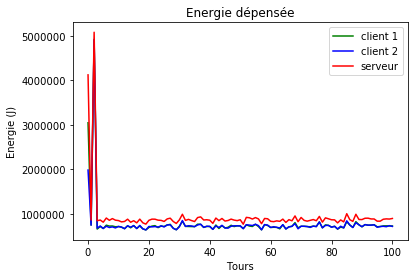

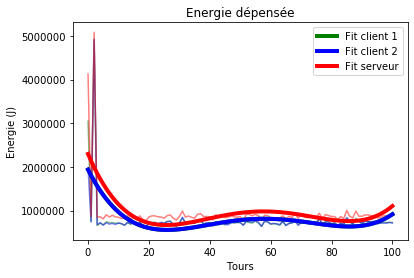

In [74]:
client = pd.read_csv("mxnet_gluon/result_client.csv",';', usecols=['duration','package_0','core_0','uncore_0'])
serveur = pd.read_csv("mxnet_gluon/result_server.csv",';', usecols=['duration','package_0','core_0','uncore_0'])

graphes(client, serveur)

Cette configuration est très peu énergivore aussi, on note que la moyenne des clients est de 776 kJ, et 936 kJ pour le serveur.

## Conclusion

Avec ces différents tests, on a pu constater que certaines pratiques, certains outils ou certains datasets sont très énergivores comparé à certains autres.  

1. L'outil qui consomme le plus est sans aucun doute **Pytorch** avec **Cifar10** qui varie entre 18 et 50 MJ selon les paramètres.  
2. Ensuite **Tensorflow** avec **Cifar10** consomme de 1 à 10 MJ.  
3. Puis **Tensorflow** avec **Mnist** consomme entre 850 kJ et 1.35 MJ.  
4. Et enfin **Mxnet** avec **Gluon** consomme entre 770 kJ et 940 kJ.  

On peut aussi noter que les paramètres comme les **classes**, **epochs** ou **batch_size** influent grandement sur la consommation.  
Si la taille des **classes** est grande, la consommation diminue de moitié.  
Si on augmente les **epochs**, la consommation fluctue beaucoup plus, mais diminue grandement en moyenne.  
Et si on modifie le **batch_size**, c'est à ce moment là que la consommation diminue le plus fortement.

<div style="text-align:right;"><strong>Larzul Hippolyte</strong></div>